In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Exploratory Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

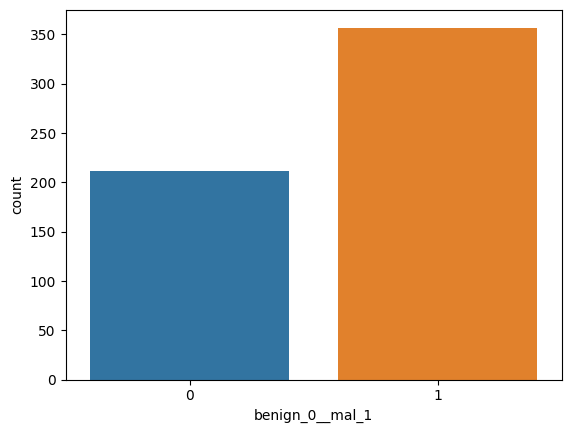

In [5]:
# For classification problems, it is important to check the balance of the target variable
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot: >

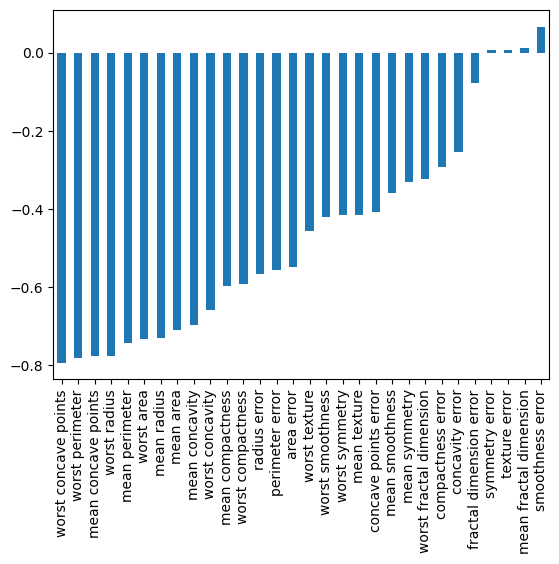

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

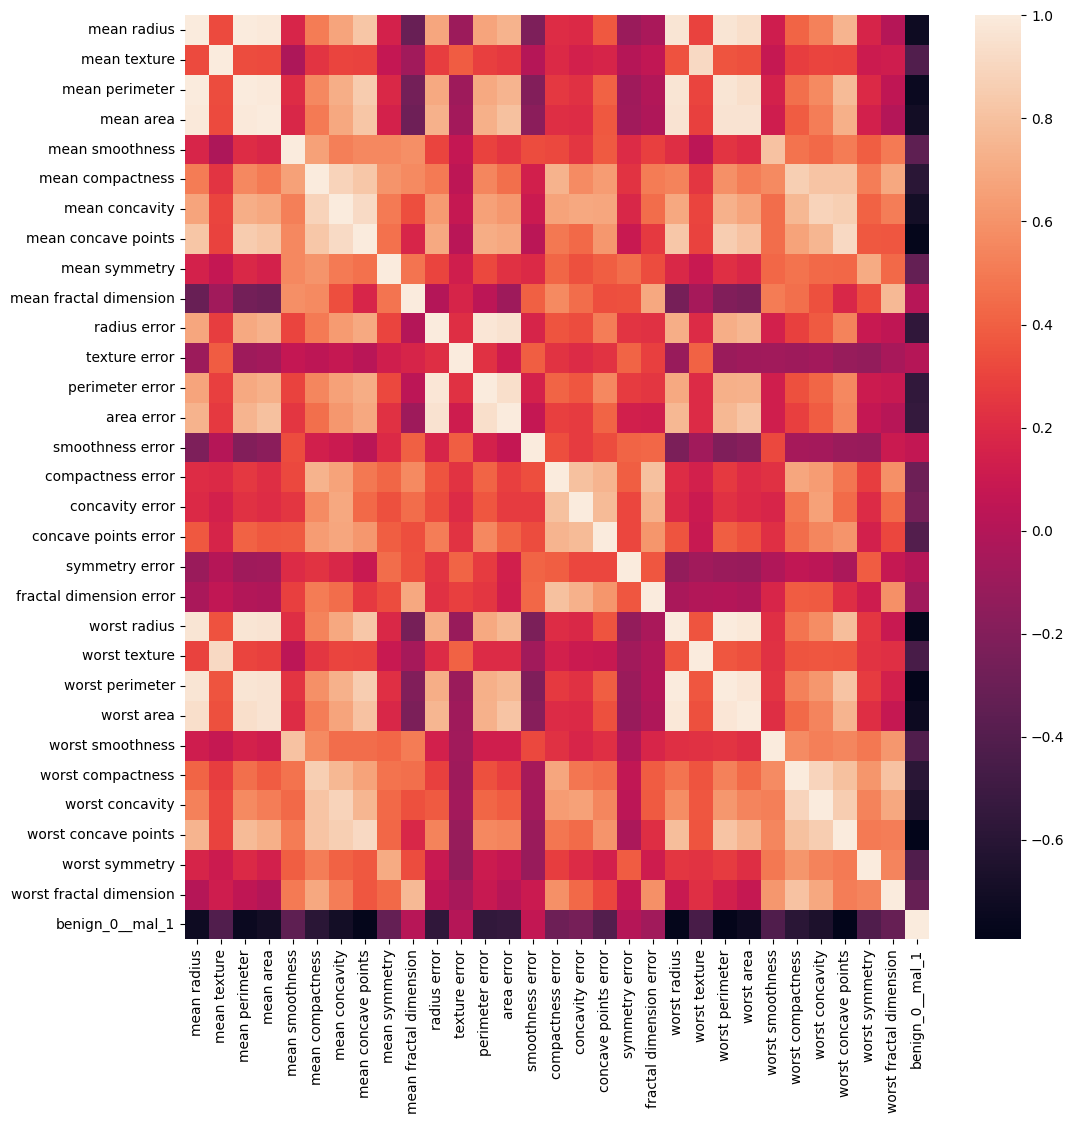

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

# Data Preprocessing

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
# Let's try overfit to the training data
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6897 - val_loss: 0.6654
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6420 - val_loss: 0.6228
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5999 - val_loss: 0.5811
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5493 - val_loss: 0.5225
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4886 - val_loss: 0.4628
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4336 - val_loss: 0.4110
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3869 - val_loss: 0.3647
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3459 - val_loss: 0.3256
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3110 - val_loss: 0.2901
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2829 - val_loss: 0.2641
Epoch 11

<AxesSubplot: >

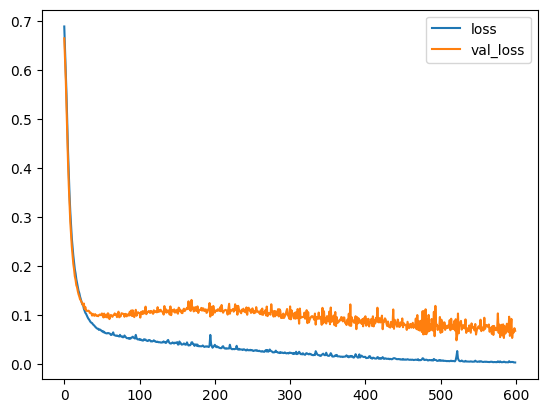

In [17]:
loss = pd.DataFrame(model.history.history)
loss.plot()

As we can see, in the beginning, during the first couple of epochs, both validation and training losses are decreasing. That means we have not overfitted our data. At a certain point, the training loss still decrease, but the validation losses start to increase.

=> We are currently overfitting our training dataset (or we are training too many epochs)

# Prevent Overfitting

Let's try create a new model again.

In [18]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

### Early Stopping

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

The callback "EarlyStopping" will stop training when a monitored quantity has stopped improving. Parameters:
- monitor: In this project, we will monitor the loss using 'val_loss'
- min_delta: minimum change required
- patience: number of epochs with no improvement
- mode (auto, min, max): whether you want to maximize the thing you are monitoring (e.g. accuracy), or minimize it (e.g. val_loss)

In [21]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6789 - val_loss: 0.6625
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6451 - val_loss: 0.6314
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6071 - val_loss: 0.5826
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5595 - val_loss: 0.5332
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5119 - val_loss: 0.4820
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4629 - val_loss: 0.4323
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4159 - val_loss: 0.3863
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3723 - val_loss: 0.3420
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3333 - val_loss: 0.3037
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2976 - val_loss: 0.2703
Epoch 11

<AxesSubplot: >

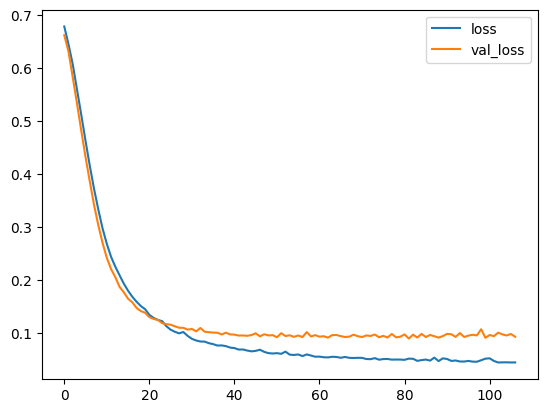

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Dropout Layers

Dropout Layers: Dropout can be added to layers to "turn off" neurons during training to prevent overfitting. Each dropout layer will drop a user-defined percentage of neuron units in the previous layer every batch (not give the neuron any weights and biases during a batch).

In [26]:
from tensorflow.keras.layers import Dropout

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # 50% of neurons in the first layer will be turned off randomly
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) # 50% of neurons in the second layer will be turned off randomly

# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7172 - val_loss: 0.6857
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6932 - val_loss: 0.6755
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6752 - val_loss: 0.6675
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6722 - val_loss: 0.6598
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6594 - val_loss: 0.6511
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6408 - val_loss: 0.6406
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6339 - val_loss: 0.6226
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6117 - val_loss: 0.5965
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6126 - val_loss: 0.5711
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5812 - val_loss: 0.5414
Epoch 11

<AxesSubplot: >

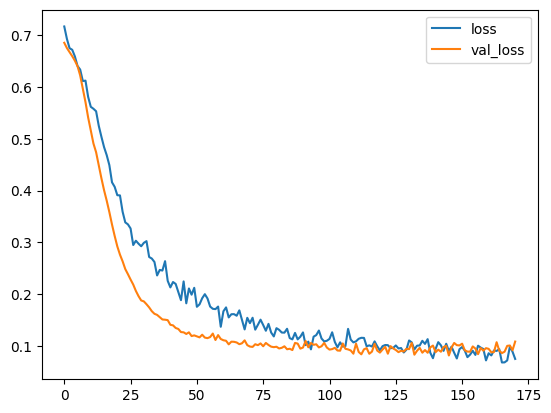

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is even better performance. Note how the training loss and validation loss are both decreasing, and eventually flattened out at the same rate. This is the behavior we want to see.

# Evaluation

predict_classes has been removed from latest version of keras. What predict_classes do is it predicts the class directly, whereas predict gives you the probability of each class. Since this is a binary problem (0 or 1), the output class is determined by whether the probability is bigger than 0.5.

In [35]:
# *1 to convert boolean to integer
predictions = (model.predict(X_test) > 0.5)*1
predictions

5/5 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [38]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 6 82]]
